# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 1 - Arytmetyka komputerowa

#### Zadanie 1 -  Sumowanie liczb pojedynczej precyzji

In [1]:
from numpy import float32, float64
from matplotlib import pyplot as plt
import time


# helper functions
def printTime(startTime):
    print('{:<20}: {}s'.format('Czas', round(time.perf_counter() - startTime, 4)))


def printExpected(expected):
    print('{:<20}: {}'.format('Oczekiwana', expected))


def printCalculated(calculated):
    print('{:<20}: {}'.format('Obliczona', calculated))


def printErrors(expected, calculated):
    print('{:<20}: {}'.format('Bezwzgledny', absolute_error(expected, calculated)))
    print('{:<20}: {}'.format('Wzgledny', relative_error(expected, calculated)))


def printData(expected, calculated):
    printExpected(expected)
    printCalculated(calculated)
    printErrors(expected, calculated)


def relative_error(expected, current):
    return float64(absolute_error(expected, current) / expected)


def absolute_error(expected, current):
    return float64(abs(expected - current))

In [2]:
# define constant
x = float32(0.53125)
expected = 5312500
numbers = [x] * (10 ** 7)

In [3]:
def suma_float32(arr):
    suma_ = float32(0)
    for i in arr:
        suma_ += i

    return suma_

startTime = time.perf_counter()
suma = suma_float32(numbers)
printTime(startTime)
printData(expected, suma)

Czas                : 1.6031s
Oczekiwana          : 5312500
Obliczona           : 5030840.5
Bezwzgledny         : 281659.5
Wzgledny            : 0.05301825882352941


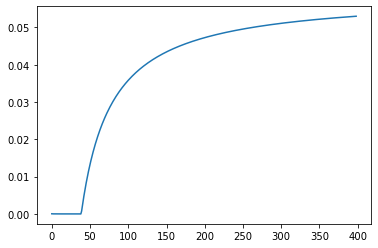

In [4]:
err = []
partialSum = float32(0)
for (index, value) in enumerate(numbers):
    partialSum += value

    if index % 25000 == 0 and index > 0:
        err.append(relative_error(index * x, partialSum))

plt.plot(err)
plt.show()

In [5]:
def recur_sum(arr):
    if len(arr) == 1:
        return arr[0]

    len_ = int(len(arr) / 2)
    return recur_sum(arr[0:len_]) + recur_sum(arr[len_:])

startTime = time.perf_counter()
sum_ = recur_sum(numbers)
printTime(startTime)
printData(expected, sum_)

Czas                : 9.5953s
Oczekiwana          : 5312500
Obliczona           : 5312500.0
Bezwzgledny         : 0.0
Wzgledny            : 0.0


In [6]:
# dane dla ktorych recur_sum nie zwraca idealnie wyniku
x2 = float32(0.0001)
expected2 = 1000
numbers2 = [x2] * (10 ** 7)

startTime = time.perf_counter()
sum_2 = recur_sum(numbers2)
printTime(startTime)
printData(expected2, sum_2)

Czas                : 10.777s
Oczekiwana          : 1000
Obliczona           : 999.9998779296875
Bezwzgledny         : 0.0001220703125
Wzgledny            : 1.220703125e-07


#### Zadanie 2 - Algorytm Kahana

In [7]:
startTime = time.perf_counter()
sum = float32(0.0)
err = float32(0.0)
for val in numbers:
    y = val - err           # mały błąd stosujemy do małej wartości, która chcemy dodać do naszej sumy, więc nie tracimy dokładności
    temp = sum + y          # sumujemy obecny element z suma, czyli dodajemu duza liczba do bardzo malej - tracimy dokladnosc
    err = (temp - sum) - y  # wyliczamy sobie błąd, ktory zostal popelniony, w idealnym swiecie powinno byc zawsze zerem
                            # wazna kolejnosc, odejmujemy duze liczby dostajemy mala liczbe i dopiero od niej odemujemy y otrzymujac wartosc bledu
    sum = temp              # aktualizuj sume

printTime(startTime)
printData(expected, sum)

Czas                : 9.5966s
Oczekiwana          : 5312500
Obliczona           : 5312500.0
Bezwzgledny         : 0.0
Wzgledny            : 0.0


#### Zadanie 3 - Sumy częściowe

In [8]:
def riemman_func(k, s, float_type):
    return float_type(1 / (k ** s))


def dirichlet_func(k, s, float_type):
    return float_type(((-1) ** (k - 1)) * riemman_func(k, s, float_type))


def sum_riemann(n, s, float_type, dir=1):
    start = 1 if dir == 1 else n+1
    stop = n + 1 if dir == 1 else 0

    sum = float_type(0.0)
    for k in range(start, stop, dir):
        sum += riemman_func(k, s, float_type)

    return sum


def sum_dirichlet(n, s, float_type, dir=1):
    start = 1 if dir == 1 else n+1
    stop = n + 1 if dir == 1 else 0

    sum = float_type(0.0)
    for k in range(start, stop, dir):
        sum += dirichlet_func(k, s, float_type)

    return sum


s32 = [float32(2), float32(3.6667), float32(5), float32(7.2), float32(10)]
s64 = [float64(2), float64(3.6667), float64(5), float64(7.2), float64(10)]
n = [50, 100, 200, 500, 1000]
dirs = [1, -1]

for sum_function in [sum_dirichlet, sum_riemann]:
    print('-' * 104)
    print('|{:^102}|'.format(sum_function.__name__))
    print('-' * 104)
    for i in range(len(s32)):
        print('|{:^10}|{:^7}|{:^20}|{:^20}|{:^20}|{:^20}|'
              .format('Step', 'Iters', 'Single forward',  'Single backward', 'Double forward', 'Double backward'))
        for iterations in n:
            result = []
            for precision in [float32, float64]:
                for dir in dirs:
                    step_to_use = s32[i] if precision == float32 else s64[i]
                    result.append(sum_function(iterations, step_to_use, precision, dir))

            print('|{:^10}|{:^7}|{:^20}|{:^20}|{:^20}|{:^20}|'.format(step_to_use, iterations, result[0], result[1],
                                                                       result[2], result[3]))
        print('-' * 104)
    print('\n')

--------------------------------------------------------------------------------------------------------
|                                            sum_dirichlet                                             |
--------------------------------------------------------------------------------------------------------
|   Step   | Iters |   Single forward   |  Single backward   |   Double forward   |  Double backward   |
|   2.0    |  50   | 0.8222709894180298 | 0.8226554989814758 | 0.8222710318260295 | 0.822655499338524  |
|   2.0    |  100  | 0.8224174976348877 | 0.8225155472755432 | 0.8224175333741286 | 0.8225155629790689 |
|   2.0    |  200  | 0.8224546909332275 | 0.8224793672561646 | 0.822454595922551  | 0.8224793477851284 |
|   2.0    |  500  | 0.8224653601646423 | 0.8224689960479736 | 0.8224650374240963 | 0.8224690214719695 |
|   2.0    | 1000  | 0.8224668502807617 | 0.822467565536499  | 0.8224665339241114 | 0.8224675319271088 |
-------------------------------------------------------

Parę wniosków:\
W obu funkcjach przy kroku >= 7.2 róznice w wynikach są prawie niezauważalne\
Dla szeregu naprzemiennego (dirichlet) wyniki są bardziej zbliżone do siebie, dzięki temu że dodawane do siebie liczby w kolejnych krokach są mniejsze niż w przypadku zwykłego dodawania

Dirichlet | step: 2.0 | iter: 50 | float_type: float32


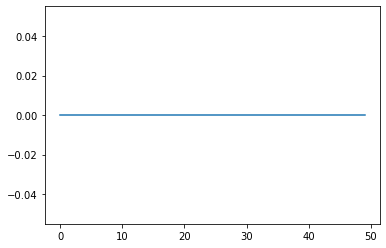

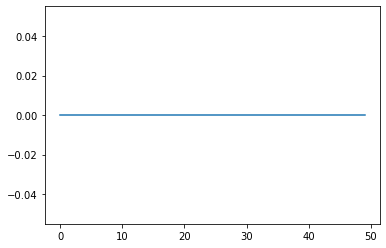

Dirichlet | step: 2.0 | iter: 50 | float_type: float64


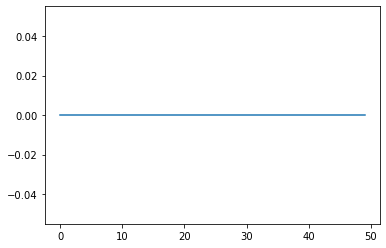

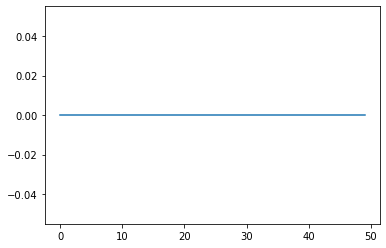

In [9]:
def compare_realtive_errors_dirichlet(n, s, float_type, dir=1):
    print('Dirichlet | step: {} | iter: {} | float_type: {}'.format(s, n, float_type.__name__))
    err1 = []
    err2 = []
    start = 1 if dir == 1 else n+1
    stop = n + 1 if dir == 1 else 0

    for k in range(start, stop, dir):
        x = dirichlet_func(k, s, float_type)
        y = dirichlet_func(k+1, s, float_type)
        z = dirichlet_func(k+2, s, float_type)
        err1.append(relative_error(float_type(x + y + z), float_type(float_type(x+y) + z)))
        err2.append(relative_error(float_type(x + y + z), float_type(x + float_type(y+z))))

    plt.plot(err1)
    plt.show()
    plt.plot(err2)
    plt.show()


def compare_realtive_errors_riemann(n, s, float_type, dir=1):
    print('Riemann | step: {} | iter: {} | float_type: {}'.format(s, n, float_type.__name__))
    err1 = []
    err2 = []
    start = 1 if dir == 1 else n+1
    stop = n + 1 if dir == 1 else 0

    for k in range(start, stop, dir):
        x = riemman_func(k, s, float_type)
        y = riemman_func(k+1, s, float_type)
        z = riemman_func(k+2, s, float_type)
        err1.append(relative_error(float_type(x + y + z), float_type(float_type(x+y) + z)))
        err2.append(relative_error(float_type(x + y + z), float_type(x + float_type(y+z))))

    plt.plot(err1)
    plt.show()
    plt.plot(err2)
    plt.show()

compare_realtive_errors_dirichlet(50, float32(2.0), float32, 1)
compare_realtive_errors_dirichlet(50, float64(2.0), float64, 1)


Riemann | step: 2.0 | iter: 50 | float_type: float32


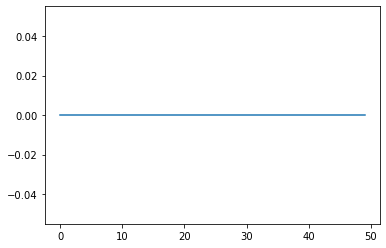

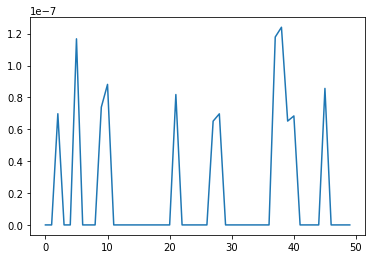

Riemann | step: 2.0 | iter: 50 | float_type: float64


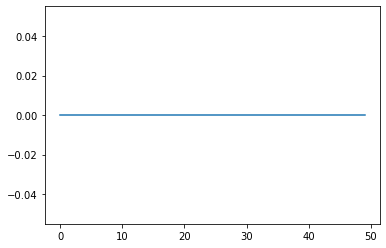

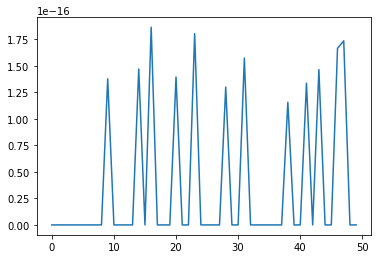

In [10]:
compare_realtive_errors_riemann(50, float32(2.0), float32, 1)
compare_realtive_errors_riemann(50, float64(2.0), float64, 1)

#### Zadanie 4 - Błędy zaokrągleń i odwzorowanie logistyczne

In [11]:
def log_func(r, x):
    return r * x * (1-x)


def bif_diag(x0, r_start, r_end, step, iterations, skip, float_type):
    print('x0: {} | iterations: {} | skip: {} | float_type: {}'.format(x0, iterations, skip, float_type.__name__))
    r = float_type(r_start)
    step = float_type(step)

    values = []
    xaxis = []
    while r <= r_end:
        x = float_type(x0)

        for i in range(iterations):
            x = float_type(log_func(r, x))
            if i > skip:
                values.append(x)
                xaxis.append(r)

        r += step

    plt.plot(xaxis, values, markersize=1, marker='.',  ls='')
    plt.show()

x0: 0.20000000298023224 | iterations: 200 | skip: 100 | float_type: float32


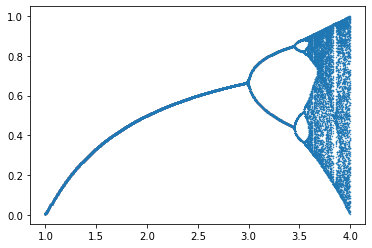

x0: 0.5299999713897705 | iterations: 200 | skip: 100 | float_type: float32


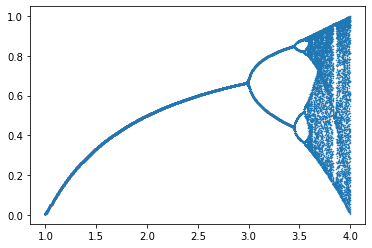

x0: 0.9599999785423279 | iterations: 200 | skip: 100 | float_type: float32


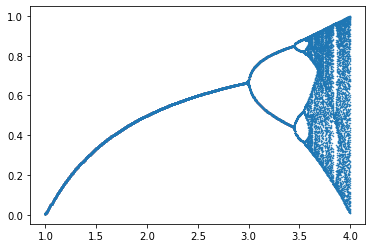

In [12]:
x0 = [float32(0.2), float32(0.53), float32(0.96)]
x0_64 = [float64(0.2), float64(0.53), float64(0.96)]
for i in range(len(x0)):
    bif_diag(x0[i], 1.0, 4.0, 0.005, 200, 100, float32)

x0: 0.20000000298023224 | iterations: 140 | skip: 100 | float_type: float32


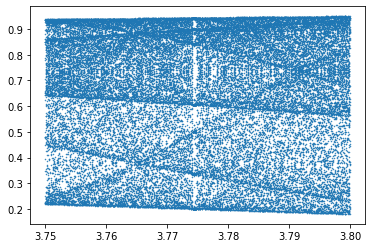

x0: 0.2 | iterations: 140 | skip: 100 | float_type: float64


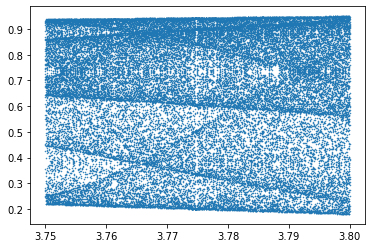

x0: 0.5299999713897705 | iterations: 140 | skip: 100 | float_type: float32


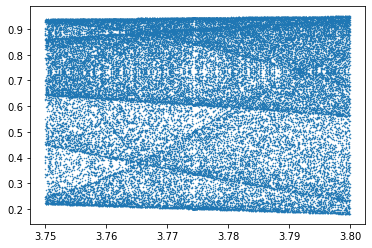

x0: 0.53 | iterations: 140 | skip: 100 | float_type: float64


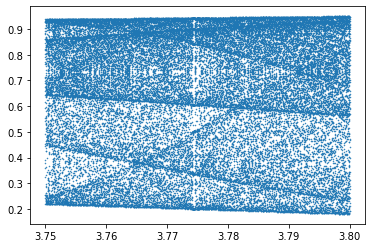

x0: 0.9599999785423279 | iterations: 140 | skip: 100 | float_type: float32


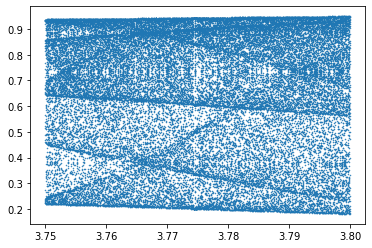

x0: 0.96 | iterations: 140 | skip: 100 | float_type: float64


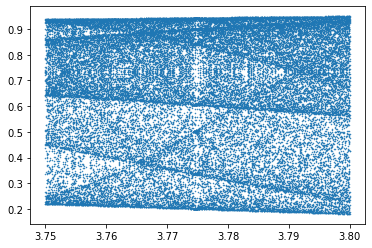

In [13]:
step = 0.00005
for i in range(len(x0)):
    bif_diag(x0[i], 3.75, 3.8, step, 140, 100, float32)
    bif_diag(x0_64[i], 3.75, 3.8, step, 140, 100, float64)

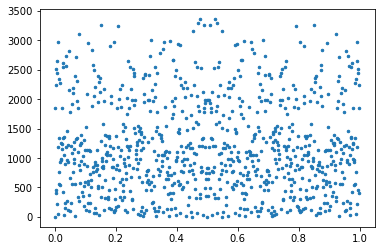

In [14]:
r = float32(4)
step = float(0.001)
cap = 8000
x0 = float32(0)
res = []
xaxis = []
eps = float32(0.000001)
while x0 <= 1:
    x = x0
    iterations = 0
    for i in range(cap):
        if x <= eps:
            xaxis.append(x0)
            res.append(iterations)
            break

        x = float32(log_func(r, x))
        iterations += 1

    x0 += step

plt.plot(xaxis, res, markersize=5, marker='.',  ls='')
plt.show()